In [20]:
import numpy as np #
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Load the data
file_path = '/content/sales_report.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,date,time,username,profile,comment,price
0,2023-05-20,03:43:04,user8291,voucher 1 hari,Highly recommend,3000
1,2023-06-03,18:00:06,user2116,voucher 3 hari,Poor quality,7000
2,2024-01-06,22:44:32,user1061,voucher 3 hari,Poor quality,7000
3,2023-09-27,12:28:38,user1281,voucher 1 hari,Not satisfied,3000
4,2023-03-27,17:04:49,user1301,voucher 3 hari,Amazing!,7000


In [22]:
df.isna().sum()

date        0
time        0
username    0
profile     0
comment     0
price       0
dtype: int64

In [23]:
df.comment.value_counts()

comment
Great product!       67
Highly recommend     61
Excellent service    60
Not satisfied        57
Not as described     56
Would buy again      54
Poor quality         50
Just okay            48
Amazing!             47
Name: count, dtype: int64

In [24]:
df.profile.value_counts()

profile
voucher 3 hari      177
voucher 1 minggu    164
voucher 1 hari      159
Name: count, dtype: int64

In [32]:
df.price.value_counts()

price
7000     177
12000    164
3000     159
Name: count, dtype: int64

In [25]:
df.profile = df.profile.map({
    "voucher 1 hari":0,
    "voucher 3 hari":1,
    "voucher 1 minggu":2
})

In [26]:
# Convert 'date' and 'time' columns to datetime format
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Drop the original 'date' and 'time' columns
df.drop(columns=['date', 'time', 'username', 'comment'], inplace=True)

# Set 'datetime' as the index
df.set_index('datetime', inplace=True)

# Display the preprocessed data
df.head()


,profile,price
datetime,,
2023-05-20 03:43:04,0,3000
2023-06-03 18:00:06,1,7000
2024-01-06 22:44:32,1,7000
2023-09-27 12:28:38,0,3000
2023-03-27 17:04:49,1,7000


In [27]:
df.duplicated().sum()

497

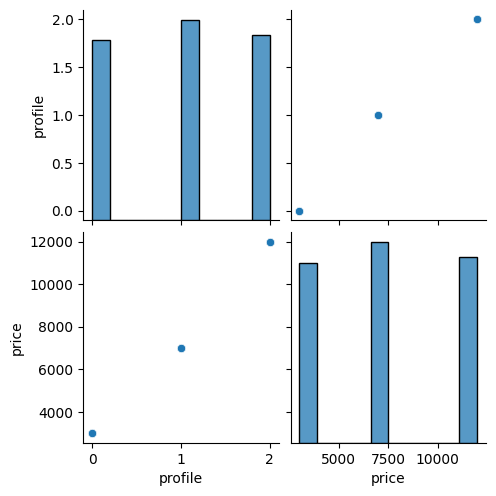

In [33]:
sns.pairplot(df)

In [34]:
X = df.drop("price", axis=1)
y = df["price"]

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25, random_state=1)

In [36]:
import pickle

### Linear Regression Model

In [37]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [39]:
model.score(xtest, ytest)

0.9954555557262955

In [38]:
preds = model.predict(xtest)
mse = mean_squared_error(ytest, preds)
rmse = mse**0.5
r2 = r2_score(ytest, preds)

print(f"Mean Squared Error : {mse}")
print(f"Root Mean Squared Error : {rmse}")
print(f"R Squared : {r2}")

Mean Squared Error : 58373.64118461384
Root Mean Squared Error : 241.60637653963903
R Squared : 0.9954555557262955


In [43]:
pickle.dump(model, open("LinearRegressor.pkl","wb"))